In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

%matplotlib inline

from sklearn.cluster import AffinityPropagation
from time import gmtime, strftime

In [2]:
file = []

with np.load('input/frames.npz', mmap_mode='r') as data:
    for name in data:
        if 'mask' not in name:
            file.append(name)

In [98]:
file[0]

'19_28'

In [3]:
img = []

with np.load('input/frames.npz', mmap_mode='r') as data:
    for name in data:
        if 'mask' not in name:
            img.append((data[name] / data[name].mean() * 110).flatten())

In [6]:
dist = []

with open("csv/distance between frames.csv", "r") as data:
    reader = csv.reader(data)
    for row in reader:
        if len(row) > 0:
            dist.append(list(map(float, row)))
            
dist = np.array(dist)

In [7]:
dist.max(), dist[dist != 0].min(), dist[dist != 0].mean()

(28417.003744599999, 13.087201241100001, 17018.984054018059)

In [8]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

af = AffinityPropagation(affinity="precomputed", max_iter=4000, convergence_iter=200, copy=True).fit(-1 * dist)

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2016-08-08 10:24:24
2016-08-08 10:25:45


In [9]:
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
n_clusters_

345

In [10]:
clusters = {}

for i in range(n_clusters_):
    clusters[i] = []

for i in range(len(img)):
    clusters[af.labels_[i]].append(i)

In [11]:
mean = []
max_cl = np.full((n_clusters_,), 0, dtype=float)
mean_cl = np.full((n_clusters_,), 0, dtype=float)

for n in clusters:
    d = []
    for i in clusters[n]:
        for j in clusters[n]:
            d.append(dist[i,j])
            mean.append(dist[i,j])
            
    d = np.array(d)
    max_cl[n] = d.max()
    mean_cl[n] = d.mean()

In [12]:
sizes = [len(clusters[n]) for n in clusters]

In [13]:
mean = np.array(mean)
mean1 = mean.mean()
mean2 = mean_cl.mean()
mean1, mean2

(13398.935201160675, 8659.1192445697434)

In [14]:
max_cl.mean()

13501.546370381857

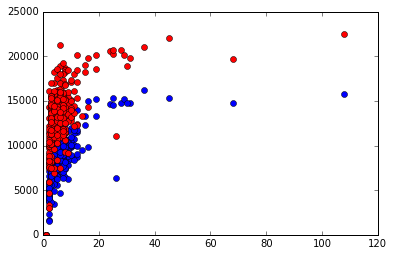

In [15]:
plt.plot(sizes, mean_cl, 'bo', sizes, max_cl, 'ro')
plt.show()

In [16]:
names = []

for i in range(len(img)):
    if af.labels_[i] == 16:
        names.append(file[i])

In [17]:
names = np.array(names)
names.sort()

In [18]:
names

array(['46_43'], 
      dtype='<U5')

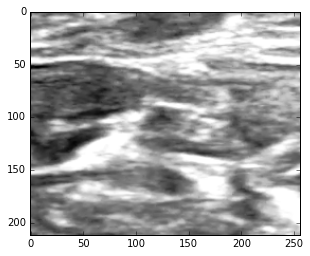

In [106]:
with np.load("input/frames.npz", mmap_mode='r') as data:
    plt.imshow(data['10_97'], cmap='Greys_r')
    plt.show()

In [37]:
def distance(x, y):
    return ((x - y) ** 2).sum()

In [56]:
disp = []

for n in clusters:
    summ = np.full((54272,), 0, dtype=np.float64)
    for i in clusters[n]:
        summ += img[i]
    mean = summ / len(clusters[n])
    summ = 0
    for i in clusters[n]:
        summ += distance(mean, img[i])
    disp.append(summ / len(clusters[n]))

In [57]:
disp = np.array(disp)

In [61]:
disp[disp != 0].min(), disp.max(), disp[disp != 0].mean()

(1513.0106821804784, 11576.568079266663, 6974.6601955196666)

In [64]:
sizes = np.array(sizes)

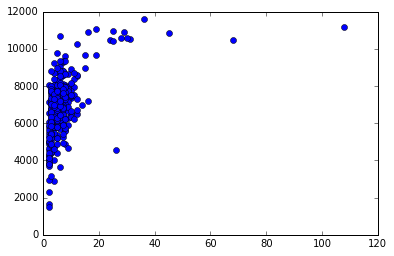

In [66]:
plt.plot(sizes[sizes != 1], disp[disp != 0], 'bo')
plt.show()

In [84]:
c = 0
dictionary = {}

with np.load('input/frames.npz', mmap_mode='r') as data:
    
    for n in clusters:
        if len(clusters[n]) != 1 and disp[n] <= 10000:
            image = np.full((212,256), 0, dtype=np.float64)
            image_mask = np.full((212,256), 0, dtype=np.float64)
            for i in clusters[n]:
                image += img[i].reshape((212,256))
                image_mask += data[file[i] + "_mask"]
            image /= len(clusters[n])
            image_mask /= len(clusters[n])
            image_mask[image_mask > 0.5] = 1
            image_mask[image_mask < 0.5] = 0
            mask1 = image_mask
            mask2 = image_mask
            mask1[mask1 == 0.5] = 1
            mask2[mask2 == 0.5] = 0
            
            dictionary[str(c)] = image
            dictionary[str(c) + '_mask1'] = mask1
            dictionary[str(c) + '_mask2'] = mask2
            
            c += 1
            
print(c)

326


In [85]:
np.savez_compressed('input/cluster_data.npz', **dictionary)
del dictionary

In [101]:
clusters[0]

[1, 827, 919, 1276, 1347, 1811, 2014, 2101, 2239, 2286]